<a href="https://colab.research.google.com/github/ashif321/Machine-Learning/blob/main/Customer_Churn_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [89]:
# Load Dataset
data = pd.read_csv('/content/churn/customer_churn_large_dataset.csv')

In [18]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0


In [ ]:
# Check the various attributes of data like shape(rows and columns), columns, datatypes

In [19]:
data.shape

(58669, 9)

In [20]:
data.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

In [21]:
# Checking the datatypes of all the columns
data.dtypes

CustomerID                      int64
Name                           object
Age                           float64
Gender                         object
Location                       object
Subscription_Length_Months    float64
Monthly_Bill                  float64
Total_Usage_GB                float64
Churn                         float64
dtype: object

In [22]:
# Check the descriptive  statistics of numeric variables
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,58669.000000,58668.000000,58668.000000,58668.000000,58668.000000,58668.000000
mean,29335.000000,44.054357,12.463541,64.997708,274.608338,0.498602
std,16936.425808,15.257855,6.931887,20.261932,130.451460,0.500002
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,14668.000000,31.000000,6.000000,47.450000,161.000000,0.000000
50%,29335.000000,44.000000,12.000000,64.950000,275.000000,0.000000
75%,44002.000000,57.000000,18.000000,82.670000,387.000000,1.000000
max,58669.000000,70.000000,24.000000,100.000000,500.000000,1.000000


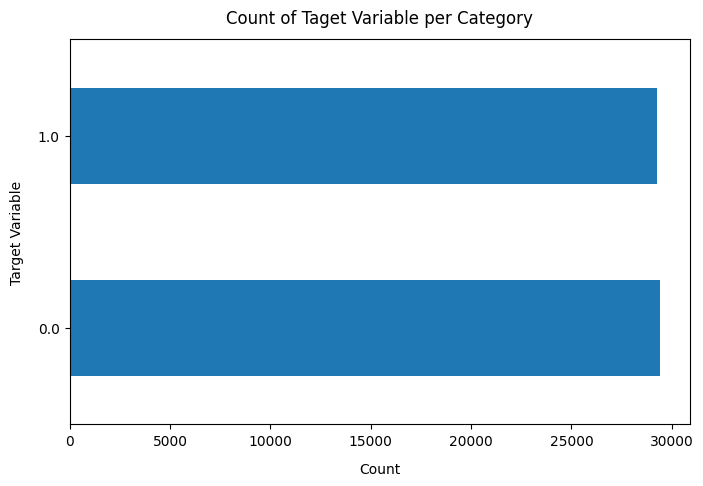

In [88]:
# plotting
data['Churn'].value_counts().plot(kind='barh', figsize=(8,5))
plt.xlabel('Count', labelpad=10)
plt.ylabel('Target Variable', labelpad=10)
plt.title('Count of Taget Variable per Category', y=1.02);

In [25]:
100*data['Churn'].value_counts()/len(data['Churn'])


0.0    50.138915
1.0    49.859381
Name: Churn, dtype: float64

In [26]:
# Concise summary of the dataframes, as we have too many columns, we are using the verbose = True mode
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58669 entries, 0 to 58668
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  58669 non-null  int64  
 1   Name                        58669 non-null  object 
 2   Age                         58668 non-null  float64
 3   Gender                      58668 non-null  object 
 4   Location                    58668 non-null  object 
 5   Subscription_Length_Months  58668 non-null  float64
 6   Monthly_Bill                58668 non-null  float64
 7   Total_Usage_GB              58668 non-null  float64
 8   Churn                       58668 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 4.0+ MB


Data Cleaning

In [27]:
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           1
Gender                        1
Location                      1
Subscription_Length_Months    1
Monthly_Bill                  1
Total_Usage_GB                1
Churn                         1
dtype: int64

In [43]:
# Handle missing data
data = data.fillna(0)

In [42]:
data['Gender'].value_counts()

Female    29519
Male      29149
0             1
Name: Gender, dtype: int64

In [57]:
data.drop(columns= ['Name'], inplace=True)

In [59]:
data = pd.get_dummies(data,columns = ['Gender','Location'], drop_first=True)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58669 entries, 0 to 58668
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  58669 non-null  int64  
 1   Age                         58669 non-null  float64
 2   Subscription_Length_Months  58669 non-null  float64
 3   Monthly_Bill                58669 non-null  float64
 4   Total_Usage_GB              58669 non-null  float64
 5   Churn                       58669 non-null  float64
 6   Gender_Female               58669 non-null  uint8  
 7   Gender_Male                 58669 non-null  uint8  
 8   Location_Chicago            58669 non-null  uint8  
 9   Location_Houston            58669 non-null  uint8  
 10  Location_Los Angeles        58669 non-null  uint8  
 11  Location_Miami              58669 non-null  uint8  
 12  Location_New York           58669 non-null  uint8  
dtypes: float64(5), int64(1), uint8(

In [64]:
# Split data  into training and testing sets
X = data.drop(columns=['Churn'])
y = data['Churn']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state= 1)

In [67]:
# Normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
X_train_scaled

array([[ 0.10385314,  1.43889743, -0.06756381, ..., -0.4986014 ,
        -0.49966707, -0.49996671],
       [ 1.68035586, -0.33129432,  1.37594839, ...,  2.00561011,
        -0.49966707, -0.49996671],
       [ 1.43173347, -1.51142215, -0.6449687 , ..., -0.4986014 ,
         2.0013326 , -0.49996671],
       ...,
       [-1.43346195,  0.2587696 ,  1.37594839, ..., -0.4986014 ,
         2.0013326 , -0.49996671],
       [-1.02027522, -1.1180462 ,  0.50984107, ...,  2.00561011,
        -0.49966707, -0.49996671],
       [ 0.21283262,  1.1766468 ,  1.23159717, ..., -0.4986014 ,
        -0.49966707, -0.49996671]])

In [70]:
# Create a Neural Network model using Tensorflow and keras
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Compile the model

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1467/1467 [==============================] - 5s 2ms/step - loss: 36.8949 - accuracy: 0.5016 - val_loss: 8.4875 - val_accuracy: 0.5026
Epoch 2/10
1467/1467 [==============================] - 3s 2ms/step - loss: 22.6487 - accuracy: 0.5031 - val_loss: 68.4878 - val_accuracy: 0.4957
Epoch 3/10
1467/1467 [==============================] - 3s 2ms/step - loss: 18.1885 - accuracy: 0.5015 - val_loss: 13.2634 - val_accuracy: 0.4975
Epoch 4/10
1467/1467 [==============================] - 3s 2ms/step - loss: 17.2159 - accuracy: 0.4981 - val_loss: 22.0612 - val_accuracy: 0.4955
Epoch 5/10
1467/1467 [==============================] - 3s 2ms/step - loss: 12.5439 - accuracy: 0.5008 - val_loss: 22.3050 - val_accuracy: 0.5037
Epoch 6/10
1467/1467 [==============================] - 4s 3ms/step - loss: 11.9204 - accuracy: 0.4978 - val_loss: 2.6334 - val_accuracy: 0.4991
Epoch 7/10
1467/1467 [==============================] - 3s 2ms/step - loss: 10.8490 - accuracy: 0.5006 - val_loss: 14.9376 - v

In [75]:
model.layers[1].get_weights()

[array([[ 0.01521693, -0.01185171, -0.02481654, ..., -0.24726942,
         -0.12473494, -0.04705112],
        [-0.01505161, -0.23561025, -0.03573342, ..., -0.08351433,
          0.11635521,  0.00812637],
        [ 0.06462079, -0.23597567,  0.13104384, ..., -0.06618731,
          0.09391664, -0.01018515],
        ...,
        [-0.05034547,  0.07709   , -0.21952428, ..., -0.25225976,
          0.03155304,  0.22041248],
        [-0.15245727,  0.02949651,  0.05301785, ...,  0.1275368 ,
         -0.07398187,  0.21305174],
        [-0.07667539,  0.0644812 ,  0.19584595, ..., -0.28505278,
         -0.00833273,  0.07032532]], dtype=float32),
 array([-0.04569796, -0.02729254,  0.05466168,  0.00840871,  0.02164589,
        -0.03472432, -0.05822664, -0.05657669,  0.        , -0.02666429,
         0.0379781 , -0.06435914, -0.02831726, -0.06770016, -0.04258284,
         0.        , -0.06100784,  0.01772667,  0.0206021 ,  0.        ,
        -0.01208989,  0.        ,  0.00220681, -0.07730506, -0.057

In [76]:
# Prediction
model.predict(X_test_scaled)

367/367 [==============================] - 1s 2ms/step


array([[0.4890777 ],
       [0.5980512 ],
       [0.51721567],
       ...,
       [0.55474406],
       [0.5602856 ],
       [0.5317671 ]], dtype=float32)

In [ ]:
# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{report}')

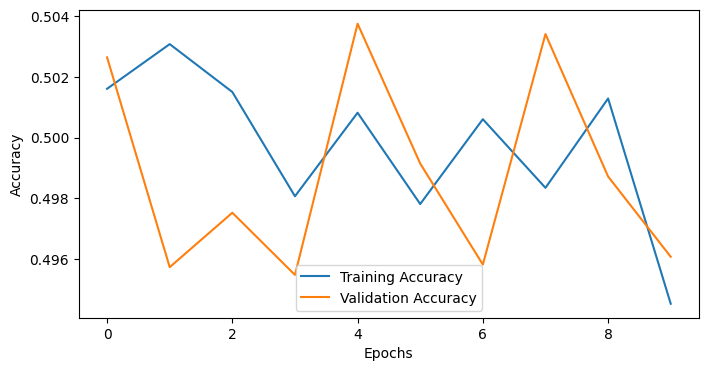

In [85]:
# Plot training history
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
for i, predictor in enumerate(data.drop(columns= ['Churn', 'Total_Usage_GB', 'Monthly_Bill'])):
    plt.figure(i)
    sns.countplot(data = data, x=predictor, hue='Churn')
